In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [41]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [42]:
conso_file = r"Y:\Documents\conso.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245914 entries, 0 to 245913
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  245914 non-null  int64  
 1   kWh       245914 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.8 MB


<Axes: >

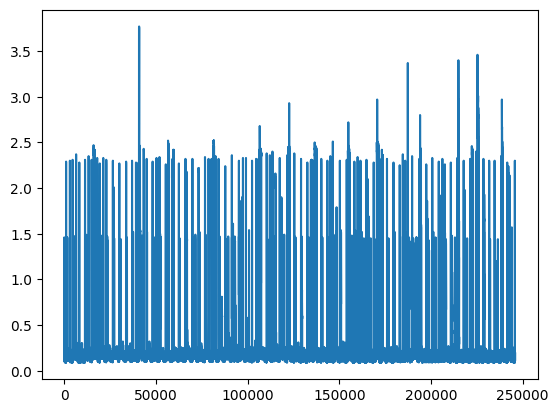

In [43]:
conso_data['kWh'].plot()

In [44]:
l=len(conso_data)-1
l

245913

In [45]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [46]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
245909,28413,0.13,28.413,126.702566,5902289133
245910,28527,0.13,28.527,126.196235,5902317660
245911,28600,0.12,28.600,125.874126,5902346260
245912,28317,0.13,28.317,127.132111,5902374577
245913,28707,0.12,28.707,125.404953,5902403284


In [47]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

5902403284000

In [48]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2024, 3, 7, 2, 1, 49, 881151)

In [49]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 02:02:16.170151,07/03/24
1,26243,0.14,26.243,137.179438,52532,2024-03-07 02:02:42.413151,07/03/24
2,25885,0.14,25.885,139.076685,78417,2024-03-07 02:03:08.298151,07/03/24
3,25754,0.14,25.754,139.784111,104171,2024-03-07 02:03:34.052151,07/03/24
4,25774,0.14,25.774,139.675642,129945,2024-03-07 02:03:59.826151,07/03/24
...,...,...,...,...,...,...,...
245909,28413,0.13,28.413,126.702566,5902289133,2024-05-14 09:33:19.014151,14/05/24
245910,28527,0.13,28.527,126.196235,5902317660,2024-05-14 09:33:47.541151,14/05/24
245911,28600,0.12,28.600,125.874126,5902346260,2024-05-14 09:34:16.141151,14/05/24
245912,28317,0.13,28.317,127.132111,5902374577,2024-05-14 09:34:44.458151,14/05/24


In [50]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, month, year


('14/05/24', 5, 2024)

In [51]:
here = now.strftime('%H:%M:%S')
here

'09:35:17'

In [52]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [53]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
244797,28408,0.13,28.408,126.724866,5867895189,2024-05-14 00:00:05.070151,14/05/24
244798,28059,0.13,28.059,128.301080,5867923248,2024-05-14 00:00:33.129151,14/05/24
244799,26084,0.14,26.084,138.015642,5867949332,2024-05-14 00:00:59.213151,14/05/24
244800,26681,0.13,26.681,134.927476,5867976013,2024-05-14 00:01:25.894151,14/05/24
244801,27421,0.13,27.421,131.286240,5868003434,2024-05-14 00:01:53.315151,14/05/24
...,...,...,...,...,...,...,...
245909,28413,0.13,28.413,126.702566,5902289133,2024-05-14 09:33:19.014151,14/05/24
245910,28527,0.13,28.527,126.196235,5902317660,2024-05-14 09:33:47.541151,14/05/24
245911,28600,0.12,28.600,125.874126,5902346260,2024-05-14 09:34:16.141151,14/05/24
245912,28317,0.13,28.317,127.132111,5902374577,2024-05-14 09:34:44.458151,14/05/24


In [54]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [55]:
data = list(df_grp['kWh'])
print(data)


[3.063, 3.794, 3.082, 3.532, 4.538, 3.563, 3.548, 3.64, 3.569, 3.347, 3.361, 4.403, 3.508, 3.441, 3.553, 3.734, 3.532, 3.344, 3.889, 3.418, 3.462, 3.638, 3.77, 3.655, 3.83, 3.834, 3.818, 3.422, 3.473, 4.415, 3.404, 4.076, 3.779, 4.061, 3.427, 3.574, 3.443, 4.129, 3.268, 3.316, 3.707, 3.689, 4.225, 3.278, 3.386, 3.76, 4.08, 3.513, 3.303, 3.285, 3.065, 3.746, 3.819, 3.783, 3.41, 3.449, 3.518, 3.266, 3.606, 3.419, 3.336, 3.539, 3.655, 3.178, 3.101, 3.403, 3.596, 4.029, 1.117]


In [56]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [57]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='moccasin',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(15, 7)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()


In [58]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.330629
dtype: float64

In [59]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.563971
dtype: float64

In [60]:
last=df_grp.iloc[-1]['kWh']
last

1.117

In [61]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:5,28408,0.13,28.408,126.724866,5867895189,2024-05-14 00:00:05.070151,14/05/24
0:0:33,28059,0.13,28.059,128.301080,5867923248,2024-05-14 00:00:33.129151,14/05/24
0:0:59,26084,0.14,26.084,138.015642,5867949332,2024-05-14 00:00:59.213151,14/05/24
0:1:25,26681,0.13,26.681,134.927476,5867976013,2024-05-14 00:01:25.894151,14/05/24
0:1:53,27421,0.13,27.421,131.286240,5868003434,2024-05-14 00:01:53.315151,14/05/24
...,...,...,...,...,...,...,...
9:33:19,28413,0.13,28.413,126.702566,5902289133,2024-05-14 09:33:19.014151,14/05/24
9:33:47,28527,0.13,28.527,126.196235,5902317660,2024-05-14 09:33:47.541151,14/05/24
9:34:16,28600,0.12,28.600,125.874126,5902346260,2024-05-14 09:34:16.141151,14/05/24


In [62]:
# premier kWh
df.iloc[1000]['dates']

Timestamp('2024-05-14 08:45:28.496151')

In [63]:
df.iloc[0].dates

Timestamp('2024-05-14 00:00:05.070151')

In [77]:
def period(kWh=1):
    if kWh==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(kWh-1)*1000-1].dates
    if len(df)>kWh*1000:
        end = df.iloc[kWh*1000-1].dates
        conso = kWh*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (kWh-1)*1000
    period = end - start

    #df.iloc[1001:2000]['dates']#.tail(1)
    print(f'{start}\n{end}\n{period}\n{conso}')


In [78]:
# premier kWh
period()

2024-05-14 00:00:05.070151
2024-05-14 08:44:59.895151
0 days 08:44:54.825000
1000


In [83]:
# 2ème kWh
p = 2
if len(df)>(p-1)*1000:
    period(p)

2024-05-14 08:44:59.895151
2024-05-14 09:35:13.165151
0 days 00:50:13.270000
117


In [84]:
# 3ème kWh
p = 3
if len(df)>(p-1)*1000:
    period(p)

In [67]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('09:35:17', 1.117, 1117)

In [68]:
df_grp.tail(7)

,kWh
days,
08/05/24,3.655
09/05/24,3.178
10/05/24,3.101
11/05/24,3.403
12/05/24,3.596
13/05/24,4.029
14/05/24,1.117


In [69]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [70]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


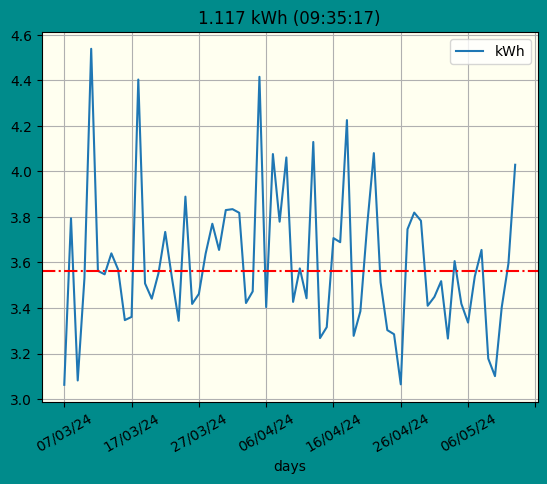

In [71]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

df_grp.iloc[:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


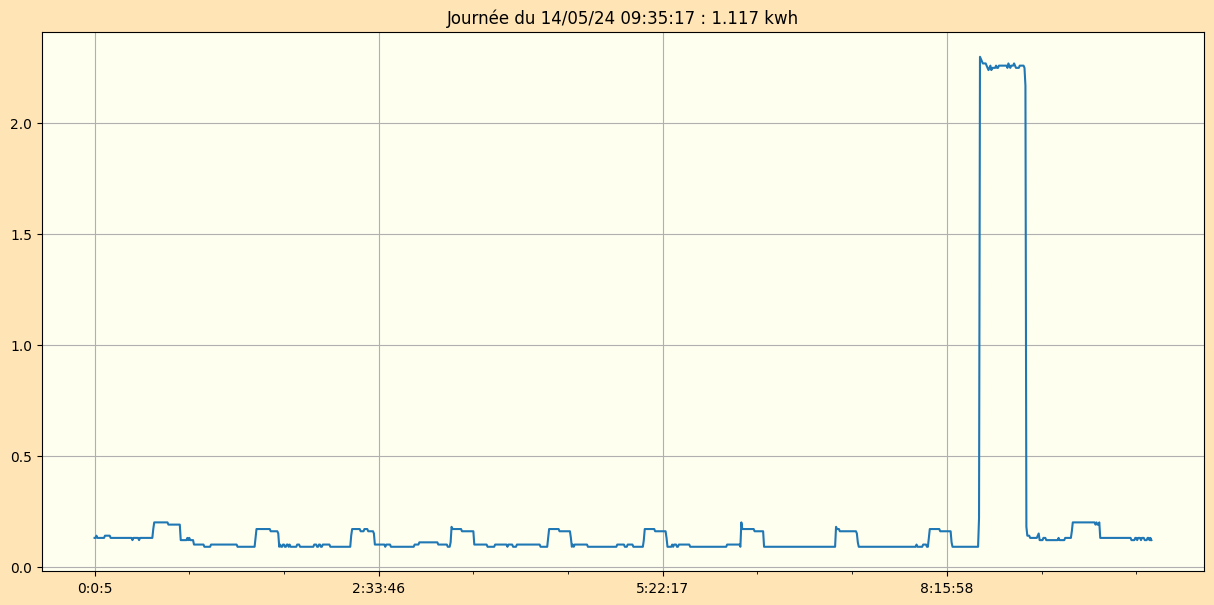

In [72]:
show(day,bgcolor='ivory')

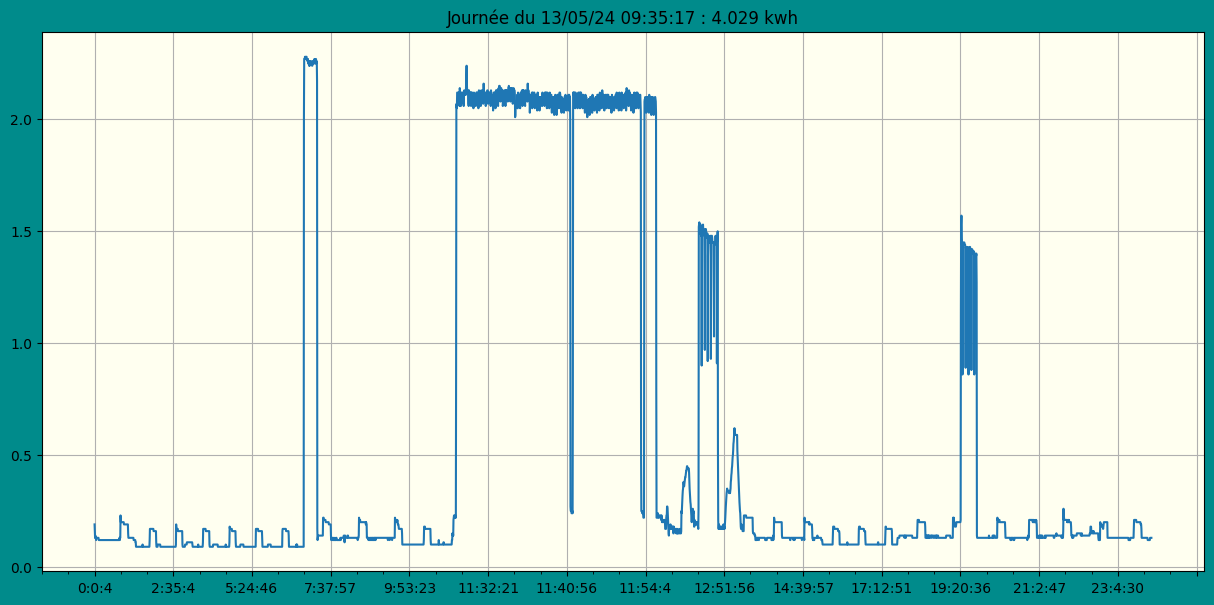

In [73]:
# plot any day
day = '13/05/24'
show(day,pltcolor='darkcyan')